# DSM020 coursework 2:

## Coursework project:

## The power of electronic word of mouth: can game developers use the language of critic's reviews to conclusively evaluate the quality of their gaming products?

### Student number: 210163148/1

## Introduction

As stated in my project proposal, the video game industry has seen an increase in economic output over recent years. And with an increase in demand for home entertainment during the pandemic, along with consoles transitioning to on-demand high graphics content, the drive in the market has the potential to increase economic output over the next few years. In 2020, a revenue of \\$155 billion dollars was created by the video game industry, and it is projected that the revenue will reach more than \\$260 billion by 2025$^{1}$. However, cloud services could provide challenges for the market growth, with multiple services currently available, including Google's Stadia as a solely dedicated cloud gaming device. With the competition increasing in the gaming market, it is important for consumers to take a nuanced approach when deciding which product or service suits them the best.

Electronic word of mouth (eWOM) is an approach that suits many consumers in obtaining current information about a product and has been researched heavily in other industries, including movies and books. eWOM refers to any positive or negative comment that has been made regarding a commercial product by a customer, and is an effective form of information transmission. Where the effects of traditional word of mouth are within a limited social boundary, eWOM's capabilities are far reaching with the help and advances of information technology and social networking$^{2}$.

Many websites have developed the tools to collect and maintain eWOM in the form of customer reviews and critics reviews. Well known review aggregators, such as IMDB and rotten tomatoes, are a rich source of reviews for movies and TV shows. Customers can frequent these websites in search for a ratings based recommendation and evidence of sentiment in written reviews, along with additional user-orientated information.

With this in mind, the aim of this project is to develop an understanding of the lexicon used by critics when reviewing a video game product. A series of questions will be asked of the data:

    1- Is there any correlation between the length of a critic's review and the critic's score?
    2- How many critic reviews are there per game, and does this correlate with the average critic score?
    3- What are the most frequent words used by critics when reviewing a game?
    4- What are the most frequent words used by critics when reviewing the games grouped by publisher?
    5- By grouping each individual critics scores into a ratings category based on the opencritic.com rating system(mighty, strong, fair, weak), what are the most frequent words used in each rating?

To answer each of these questions, a series of data preprocessing and data analysis techniques will be performed on the data, and visualised in a way that best answers each question. Two predictive sentiment classifiers will then be performed and evaluated, using the text of the critic reviews as the input variable to make predictions about the potential opencritic rating that it would receive (e.g. mighty, strong, fair or weak). With these approaches, the objective is to gather whether video game developers can use independent review aggregators to get a better understand about the quality of a game in a hopes of improving future sales.


## Related work

The study of video games and the effects of reviews on consumer and publisher decisions is a fairly novel area. Initial studies focused more on other industries, such as movies, tourism and books. Duan et al discovered that online review valence and volume both had an influence on the movie box office revenues, with valence having an indirect effect and volume having a direct effect$^{3}$. Another study also found that the valence of reviews (positive and negative reviews) from data collected from Amazon.com can influence the consumer demand, with positive reviews having a marginally larger influence$^{4}$. This consumer demand, in essence, increases the likelihood of sales, although these studies did not explore the use of reviews in validating the quality of a product. Another study on Amazon.com took a cross-sectional study of the effect of online reviews on the sale of books and also found that the ratings of a review has a direct positive correlation with book sales$^{5}$.

Video game companies are operating in an increasingly competitive environment, with technological advancements like cloud gaming and virtual reality beginning to gain traction as commercial products. With ratings and scores a good indication of a product's quality, the information provided through text is a means of getting ahead in the market, with the low cost of access from a large geographical market and in large scale bringing a new dynamic to any market$^{2, 6}$. Many companies are beginning study to text sentiment. For example, IBM, Twitter are an example of companies using sentiment analysis and similar technologies to gain insight into employee morale as a way to help improve the prospects of employee retention$^{7}$.  

For the purpose of this project, correlation between the sentiment of video game reviews and the review rating/score is of interest. A study by Kumar et al attempted to perform sentiment analysis using feature extraction, but used a similar feature weighting scheme as this project, TF-IDF, to standardise the features. Naive Bayes was found in the study by Kumar et al,to be the poorest performing classifier while the Maximum Entropy classifier was the best performing. The Hybrid feature extraction method improved space complexity by reducing the number of features$^{8}$. Another study used the same three classifiers (naive bayes, support vector machines and maximum entropy) to study the effectiveness of these learning techniques on sentiment. The difference in performances were negligible, although naive bayes often performed worse while SVMs fared better and also discovering that unigram format to be the most effective when implemented$^{9}$. As this project intends to use naive bayes and SVMs for classification, careful attention will be paid to these findings once they have been implemented.


## Method

### Data collection

The data collected for this project is from opencritic.com, a review aggregator for video games. The website collects reviews from a wide range of gaming journalists, as well as audience or 'amateur' reviews. On the project proposal for this project, a function was created using python, and a web-scraping library called Beautiful Soup was used to access and scrape the necessary data from the website. Data from a list of the first 100 games spanning over 5 browsing pages were collected, with the games sorted into order based on the number of reviews i.e. the 100 games with the most reviews were sampled. I collected the video game's name, developer, publisher, genre, release date, game description, critics average score (a mean score for all of the rated reviews on opencritic for that particular game), the critic review, date of review and the critic score.   

### Github

During the completion of this coursework, github has been the main location for maintaining versions my work, especially during the data analysis and sentiment classification stages. Separate notebooks were created for these two sections as a way to test the code before placing into the final project notebook, which was also updated via github. I created a personal access token to use to commit any work to my repository. It was useful to have to have my work online as it allowed me access to review my from anywhere, without the need for the files on my laptop.

The repository can be accessed here, along with all the csv files: https://github.com/Maddix88/python_msc_coursework

### Import libraries and load in the data

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import ticker  
from scipy.stats import probplot
import string
import re
from prettytable import PrettyTable
%matplotlib inline
import unittest
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("opencritic_data_cleaned.csv", index_col = 0)
df.head()

,name,developer,publisher,genre,release_date,description,critics_average_score,critic_review,date_of_review,critics_score
0,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,There's a category of games I think of as Satu...,2019-10-22 00:00:00,79.0
1,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"With The Outer Worlds, Obsidian has found its ...",2019-10-22 00:00:00,85.0
2,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A conventional, easygoing scifi RPG with sligh...",2019-10-22 00:00:00,NaN
3,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A deep, funny, and intricately designed RPG re...",2019-10-29 00:00:00,90.0
4,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,The Outer Worlds marks Obsidian operating at t...,2019-10-22 00:00:00,90.0


There are currently null values in the dataframe above. These will be removed during the separate preprocessing stages for each analysis question to prevent losing important information in one large-scale data preprocessing pipeline. The columns of interest will be selected for each question prior to the removal of null values. For example, if a row has a null value in the publisher column, but the publisher column is not required for the analysis in question, then that column will be filtered out resulting in the retention of that row when null values are removed.

Throughout the analysis, a series of functions were created and regularly updated as they were applied and troubleshooted. These functions are kept in one cell near the top of analysis, reducing the time required to search through the code to locate them.

In [3]:
def process_text(text):
    """
    Converts text to lower case, removes all punctuation and stop words, and performs tokenisation
    """
    #apply lowercase
    lower_case_text = str(text).lower()
    
    #remove punctuation
    punctuation = string.punctuation
    punc_removed_text = ""
    for letter in lower_case_text:
        if letter not in punctuation:
            punc_removed_text += letter
            
    #tokenise the text
    tokenised = word_tokenize(punc_removed_text)
    
    #remove stop words
    stop_words= stopwords.words("english")
    new_text = []
    for word in tokenised:
        if word not in stop_words:
            new_text.append(word)
    
    #get rid of apostrophe. This doesn't go when punctuation removal is applied
    while '’' in new_text:
        new_text.remove('’')
        
    #get rid of numbers as only words are required for analysis. The numbers will have no meaning
    pattern = r'[\d]+'
    numbers_removed = [re.sub(pattern, "", w) for w in new_text]
    
    #remove whitespace created by the regex method above
    while "" in numbers_removed:
        numbers_removed.remove("")
    
    #lemmatize each word using a list comprehension
    lem = WordNetLemmatizer()
    text_lemmatized = [lem.lemmatize(word) for word in numbers_removed]
    
    return text_lemmatized

def process_text_keep_stop_words(text):
    """
    Converts text to lower case, removes all punctuation and performs tokenisation. 
    Stop words are kept in the text.
    """
    #apply lowercase
    lower_case_text = str(text).lower()
    
    #remove punctuation
    punctuation = string.punctuation
    punc_removed_text = ""
    for letter in lower_case_text:
        if letter not in punctuation:
            punc_removed_text += letter
            
    #tokenise the text
    tokenised = word_tokenize(punc_removed_text)
      
    #get rid of apostrophe. This doesn't go when punctuation removal is applied
    while '’' in tokenised:
        tokenised.remove('’')
    
    return tokenised

def process_word(word):
    """
    Converts word to lower case, removes all punctuation and strips any spaces

    """
    #convert word to lowercase
    lower_case = str(word).lower()
    
    #remove punctuation
    punctuation = string.punctuation
    punc_removed = ''
    for letter in lower_case:
        if letter not in punctuation:
            punc_removed += letter
    
    #strip spaces on either side of the word
    word_stripped = punc_removed.lstrip().rstrip()
    
    return word_stripped

def categorise_scores(score):
    """
    Function that takes a critic score as an input and converts that score into an opencritic score.
    """
    if score >= 90:
        return "mighty"
    elif score >= 60 and score < 90:
        return "strong"
    elif score >= 30 and score < 60:
        return "fair"
    else:
        return "weak"
    
def bootstrap(s):
    sample_means = []
    for i in range(1000):
        n = len(s.values)
        sample = resample(s.values, n_samples=n)#s.sample(n=n, replace=True, axis=0)
        mean_of_sample = np.mean(sample)
        sample_means.append(mean_of_sample)
    return sample_means

def confidence_intervals(sample_dist):
    #CI = x bar plus or minus critical val (1.96) multiplied by standard error
    standard_error = np.std(sample_dist) 
    mean = np.mean(sample_dist)
    CI_H = mean + 1.96 * standard_error
    CI_L = mean - 1.96 * standard_error
    return [CI_L, CI_H]

### Data preprocessing and analysis

#### Question 1: Is there any correlation between the length of the critic's review and the critic's score?

This question involves the analysis of two variables- the word length of a critic's review and the score that a critic gave with that review. The score is a discrete numerical value while the reviews are in a text format, which must be modified. The process_text_keep_stop_words function is applied to the text, creating a list of words from the text that can be counted using the len() method.

The process_text function was used initially in the analysis but the removal of stop words created a reduction in the overall length of each review and an incorrect word length for the reviews, hence a new function was created that was a more simplistic version than the process_text function but had better functionality to achieve the necessary data for this analysis.

A note on the first line of code in the code cell below. the loc method was used after having used the square brackets (chained) solely as the locator for the columns. The latter treats the operation of each column as separate instead of one operation. The loc function treats the columns as one entity in the process, making the operation significantly faster, and allows the indexing of both axes, if desired$^{10}$.

In [4]:
df2 = df.loc[:,['critic_review', 'critics_score']]

#drop null values from critic review and scritics score
df2.dropna(inplace=True)

#df2.info() critic_review is an object and critics_score is a float, which are the correct data types

#get length of each review by creating a new column with the length of the review
#use process_text function to clean text
df2['review_tokenize'] = df2.loc[:,'critic_review'].apply(lambda x: process_text_keep_stop_words(x))

#get length of each review
df2['review_length'] = df2.loc[:,'review_tokenize'].apply(len)

df2.head()

,critic_review,critics_score,review_tokenize,review_length
0,There's a category of games I think of as Satu...,79.0,"[theres, a, category, of, games, i, think, of,...",65
1,"With The Outer Worlds, Obsidian has found its ...",85.0,"[with, the, outer, worlds, obsidian, has, foun...",23
3,"A deep, funny, and intricately designed RPG re...",90.0,"[a, deep, funny, and, intricately, designed, r...",24
4,The Outer Worlds marks Obsidian operating at t...,90.0,"[the, outer, worlds, marks, obsidian, operatin...",25
6,Classic RPG sensibilities enhance wonderful ch...,93.0,"[classic, rpg, sensibilities, enhance, wonderf...",17


In [5]:
#Data analysis
#mean, median, max and min review length
median_review_length = np.median(df2['review_length'])
mean_review_length = round(np.mean(df2['review_length']), 2)
max_review_length = max(df2['review_length'])
min_review_length = min(df2['review_length'])

#mean, median, max and min critics score
mean_review_score = round(np.mean(df2['critics_score']), 2)
median_review_score = np.median(df2['critics_score'])
max_review_score = max(df2['critics_score'])
min_review_score = min(df2['critics_score'])
     
#use prettytable to create a table of statistics for the two variables
statstable = PrettyTable(["", "Mean", "Median", "Maximum", "Minimum"])
statstable.add_row(['review_length', mean_review_length, median_review_length, max_review_length, min_review_length])
statstable.add_row(['critics_score', mean_review_score, median_review_score, max_review_score, min_review_score])
print(statstable)
#table 1 caption
table_1_caption = """Table 1: A statistical summary for the review length and the critics score"""
print(table_1_caption)

+---------------+-------+--------+---------+---------+
|               |  Mean | Median | Maximum | Minimum |
+---------------+-------+--------+---------+---------+
| review_length | 49.57 |  42.0  |   342   |    2    |
| critics_score | 82.78 |  85.0  |  100.0  |   15.0  |
+---------------+-------+--------+---------+---------+
Table 1: A statistical summary for the review length and the critics score


In table 1, a summary of the mean, median, maximum and minumum has been created. Considering the large range for both variables, the mean and median values are reasonably close in value. Before visualising the data, it could be asserted that both distributions are weakly skewed, with the review length skewing towards the maximum value (178 words) while the scores skew slightly towards the minimum value (15). The potential for outliers in the data are enhanced by the minor skewness.  

Below, I have attempted to get a better prediction of the means of the two variables by using a bootstrapping technique to obtain a 95% confidence interval. This calculated interval would give me 95% confidence that the true mean of the population of opencritic.com scores resides within this interval.

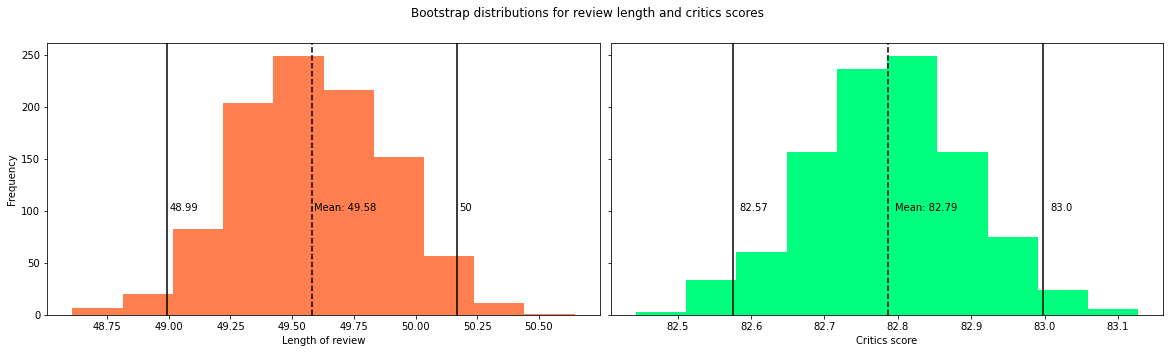

Figure 1: Bootstrap distributions for review length and critics scores, with the calculated confidence 
interval. A thousand samples were collected from the original dataframe, with replacement, and the means of each sample
calculated. The final confidence interval are calculated using the mean of the sample means and the standard error(the
standard deviation of the sample means). The interval for both distributions are heavily condensed around the mean to 
suggest that there are a large number of data points around the mean.

+---------------+------------------+-------+------------------+
|               | Lower confidence |  Mean | Upper confidence |
+---------------+------------------+-------+------------------+
| review_length |      48.99       | 49.58 |      50.17       |
| critics_score |      82.57       | 82.79 |       83.0       |
+---------------+------------------+-------+------------------+
Table 2: The upper and lower confidence for review length and critics score. The bo

In [6]:
#bootstrap samples for review length and critics score, using bootstrap function
bootstrap_review_length = bootstrap(df2['review_length'])
bootstrap_critics_score = bootstrap(df2['critics_score'])

#confidence intervals for review length and critics score, usinf confidence_interval function
CI_review_length = confidence_intervals(bootstrap_review_length)
CI_critics_score = confidence_intervals(bootstrap_critics_score)

#plot both bootstrap samples with confidence intervals

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)

axs[0].hist(bootstrap_review_length, color='coral')
axs[0].axvline(x=np.mean(bootstrap_review_length), color='black', ls='--')
axs[0].axvline(x=CI_review_length[0], color='black')
axs[0].axvline(x=CI_review_length[1], color='black')
axs[0].annotate('{}'.format(round(CI_review_length[0], 2)), (CI_review_length[0]+0.01, 100))
axs[0].annotate('{}'.format(round(CI_review_length[1]), 2), (CI_review_length[1]+0.01, 100))
axs[0].annotate('Mean: {}'.format(round(np.mean(bootstrap_review_length), 2)), (np.mean(bootstrap_review_length)+0.01, 100))
axs[0].set_xlabel("Length of review")
axs[0].set_ylabel("Frequency")

axs[1].hist(bootstrap_critics_score, color='springgreen')
axs[1].axvline(x=np.mean(bootstrap_critics_score), color='black', ls='--')
axs[1].axvline(x=CI_critics_score[0], color='black')
axs[1].axvline(x=CI_critics_score[1], color='black')
axs[1].annotate('{}'.format(round(CI_critics_score[0], 2)), (CI_critics_score[0]+0.01, 100))
axs[1].annotate('{}'.format(round(CI_critics_score[1], 2)), (CI_critics_score[1]+0.01, 100))
axs[1].annotate('Mean: {}'.format(round(np.mean(bootstrap_critics_score), 2)), (np.mean(bootstrap_critics_score)+0.01, 100))
axs[1].set_xlabel("Critics score")

plt.suptitle("Bootstrap distributions for review length and critics scores")
plt.subplots_adjust(wspace=0.02)
plt.show()

#caption for graphs
figure_1_caption = """Figure 1: Bootstrap distributions for review length and critics scores, with the calculated confidence 
interval. A thousand samples were collected from the original dataframe, with replacement, and the means of each sample
calculated. The final confidence interval are calculated using the mean of the sample means and the standard error(the
standard deviation of the sample means). The interval for both distributions are heavily condensed around the mean to 
suggest that there are a large number of data points around the mean."""
print(figure_1_caption)

statstable_CI = PrettyTable(["", "Lower confidence", "Mean", "Upper confidence"])
statstable_CI.add_row([
    'review_length', 
    round(CI_review_length[0], 2), 
    round(np.mean(bootstrap_review_length), 2), 
    round(CI_review_length[1], 2)
])
statstable_CI.add_row([
    'critics_score', 
    round(CI_critics_score[0], 2), 
    round(np.mean(bootstrap_critics_score), 2), 
    round(CI_critics_score[1], 2)
])
#caption for stats table
Table_2_caption = """Table 2: The upper and lower confidence for review length and critics score. The boundary summarises,
with a 95% confidence, that the true mean of the opencritic review population will lie within this range. A larger confidence
interval was expected of the data."""

print()
print(statstable_CI)
print(Table_2_caption)

Each time the code cell above is run, the bootstrap samples a new sample distribution, which presents a new mean and confidence interval. However, the changes are minor and the values stay reasonably similar. an approximation shall be taken of the values when analysing the results.

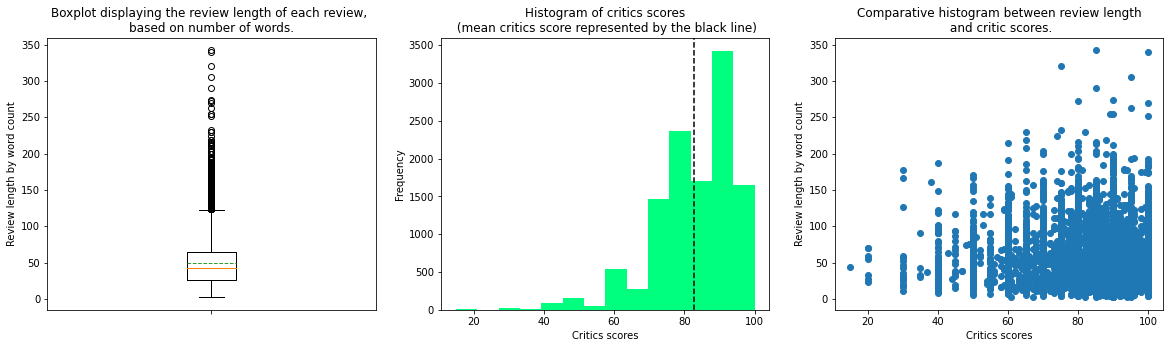


Figure 2: A simple visualisation of the distributions of the review length (based on words) and the critics scores. 
Both the boxplot and histogram show minor skewness, with most of the values heavilt concentrated around the mean.
This is emphasized in the scatterplot, where the majority of critics scores are towards the 60th to 100th percentile and the 
majority of review lengths are between 0 and 150 words. There is a correlation of -0.00852 between the two variables.


In [7]:
#plot subplots with review_length boxplot, critics_score histogram and joint scatterplot for both variables

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

#plot review_length as a boxplot and display mean
axs[0].boxplot(x=df2['review_length'], showmeans=True, meanline=True)
axs[0].set_title('Boxplot displaying the review length of each review, \nbased on number of words.')
axs[0].set_xticklabels('')
axs[0].set_ylabel('Review length by word count')

#plot critics_score
axs[1].hist(df2['critics_score'], bins=14, color='springgreen')
axs[1].set_title('Histogram of critics scores\n (mean critics score represented by the black line)')
axs[1].set_xlabel('Critics scores')
axs[1].set_ylabel('Frequency')
axs[1].axvline(x=mean_review_score, color='black', ls='--')

axs[2].scatter(df2['critics_score'], df2['review_length'])
axs[2].set_title('Comparative histogram between review length\n and critic scores.')
axs[2].set_xlabel('Critics scores')
axs[2].set_ylabel('Review length by word count')

#calculate the correlation between the two variables
figure_1_corr_coef = np.corrcoef(x=df2['review_length'], y=df2['critics_score'])

figure_2_caption = """
Figure 2: A simple visualisation of the distributions of the review length (based on words) and the critics scores. 
Both the boxplot and histogram show minor skewness, with most of the values heavilt concentrated around the mean.
This is emphasized in the scatterplot, where the majority of critics scores are towards the 60th to 100th percentile and the 
majority of review lengths are between 0 and 150 words. There is a correlation of {} between the two variables."""\
.format(round(figure_1_corr_coef[0,1], 5))

plt.show()

print(figure_2_caption)

#### Question 2: How many critic reviews are there per game, and does this correlate with the average critics score?

This question requires the manipulation of the dataframe. As I require the games to be separated, I have grouped via video game name, using a different aggregation technique for the two variables i.e. 'count' to count the number of reviews and 'mean' to get the average critics score.

The average critics score is the score calculated by opencritic.com based on the all of the reviews for that particular game. As this is an overarching score, each review has been assigned the same average critcs score for the corresponding game. Therefore, taking the mean of these values will equate to that specified value as all the values in the calculation will be the same.

In [8]:
#get the number of reviews per game and average critics score per game using groupby method
df_q2_review_count = df.groupby('name').critic_review.count()
df_q2_ave_critic_score = df.groupby('name').critics_average_score.mean()

#join both series together by columns
df_q2 = pd.concat([df_q2_review_count, df_q2_ave_critic_score], axis=1)
df_q2.head()

,critic_review,critics_average_score
name,,
Call of Cthulhu,139,67.0
Call of Duty: WWII,148,78.0
Captain Toad: Treasure Tracker,141,82.0
Crash Bandicoot N. Sane Trilogy,141,80.0
Detroit: Become Human,143,79.0


In [9]:
#Data anlysis for question 2

#descriptive statistics for number of critics reviews per game
mean_number_critics_reviews = np.mean(df_q2['critic_review'])
median_number_critics_reviews = np.median(df_q2['critic_review'])
std_number_critics_reviews = round(np.std(df_q2['critic_review']), 2)
max_number_critics_reviews = max(df_q2['critic_review'])
min_number_critics_reviews = min(df_q2['critic_review'])

#descriptive statiistics for critics average score
mean_critics_ave_score = np.mean(df_q2['critics_average_score'])
median_critics_ave_score = np.median(df_q2['critics_average_score'])
std_critics_ave_score = round(np.std(df_q2['critics_average_score']), 2)
max_critics_ave_score = max(df_q2['critics_average_score'])
min_critics_ave_score = min(df_q2['critics_average_score'])

statstable1 = PrettyTable([
                          "", 
                          "Mean", 
                          "Median", 
                          "Standard deviation", 
                          "Maximum", 
                          "Minimum"
                          ])
statstable1.add_row([
                    'Number of reviews', 
                     mean_number_critics_reviews, 
                     median_number_critics_reviews, 
                     std_number_critics_reviews, 
                     max_number_critics_reviews,
                     min_number_critics_reviews
                     ])
statstable1.add_row([
                    'Critics average score', 
                     mean_critics_ave_score, 
                     median_critics_ave_score, 
                     std_critics_ave_score, 
                     max_critics_ave_score, 
                     min_critics_ave_score
                     ])

table_3_caption = """Table 3: statistical summary for the number of reviews per game and the average critic score for each 
game. """
print(statstable1)
print(table_3_caption)

+-----------------------+--------+--------+--------------------+---------+---------+
|                       |  Mean  | Median | Standard deviation | Maximum | Minimum |
+-----------------------+--------+--------+--------------------+---------+---------+
|   Number of reviews   | 153.26 | 150.0  |       16.54        |   194   |   128   |
| Critics average score | 81.97  |  83.0  |        7.8         |   97.0  |   53.0  |
+-----------------------+--------+--------+--------------------+---------+---------+
Table 3: statistical summary for the number of reviews per game and the average critic score for each 
game. 


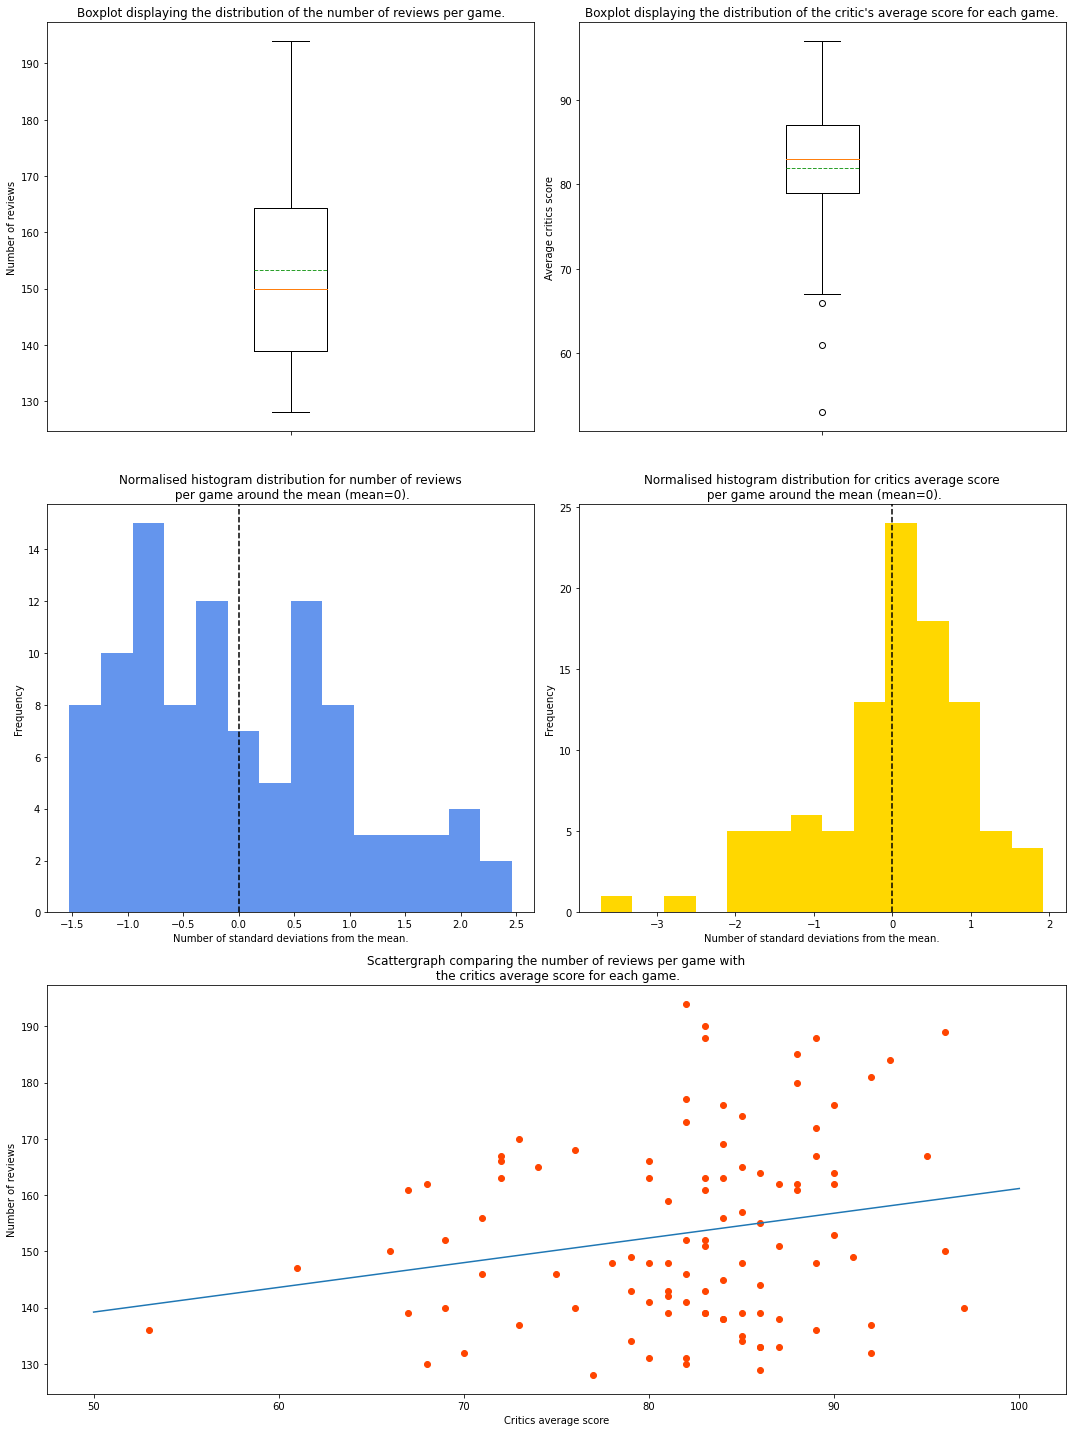

Figure 3: the number of reviews per game and opencritic's average critic score for each game, displayed
in varying distributions. There are minimal outliers in the boxplots with the mean and median lines close together, 
indicating slight skewness in the distributions. Nearly all of the data lies within 3 standard deviations of the mean.
The variables combined have a coefficient of 0.21.


In [11]:
#plot the boxplot for number of reviews and the average critic scores
#also plot the standardised form, with the mean and standard deviation displayed
#display the scatterplot comparing both variables, with the regression line

fig = plt.figure(figsize=(15,20))

gs = gridspec.GridSpec(3, 2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

#plot number of reviews per game
ax1.boxplot(x=df_q2['critic_review'], showmeans=True, meanline=True)
ax1.set_title('Boxplot displaying the distribution of the number of reviews per game.')
ax1.set_ylabel('Number of reviews')
ax1.set_xticklabels('')

#plot critics_average_score
ax2.boxplot(x=df_q2['critics_average_score'], showmeans=True, meanline=True)
ax2.set_title('Boxplot displaying the distribution of the critic\'s average score for each game.')
ax2.set_ylabel('Average critics score')
ax2.set_xticklabels('')

#normalise distributions using z-score
df_q2['normalise_critic_review'] = (df_q2['critic_review'] - mean_number_critics_reviews) / std_number_critics_reviews
df_q2['normalise_critics_average_score'] = (df_q2['critics_average_score'] - mean_critics_ave_score) /\
                                            std_critics_ave_score

#plot normalised distributions
ax3.hist(df_q2['normalise_critic_review'], bins=14, color='cornflowerblue')
ax3.set_title('Normalised histogram distribution for number of reviews\n per game around the mean (mean=0).')
ax3.set_xlabel('Number of standard deviations from the mean.')
ax3.set_ylabel('Frequency')
ax3.axvline(x=0, color='black', linestyle='--')

ax4.hist(df_q2['normalise_critics_average_score'], bins=14, color='gold')
ax4.set_title('Normalised histogram distribution for critics average score\n per game around the mean (mean=0).')
ax4.set_xlabel('Number of standard deviations from the mean.')
ax4.set_ylabel('Frequency')
ax4.axvline(x=0, color='black', linestyle='--')

#plot scatterplot comparing the two variables and regressions line
#create regression line
model = LinearRegression()
model.fit(df_q2['critics_average_score'].values.reshape(-1,1), df_q2['critic_review'].values.reshape(-1,1))
x_plot = np.linspace(50, 100, 100).reshape(-1,1)
y_plot = model.predict(x_plot)

ax5.scatter(df_q2['critics_average_score'], df_q2['critic_review'], color='orangered')
ax5.plot(x_plot, y_plot)
ax5.set_title('Scattergraph comparing the number of reviews per game with\n the critics average score for each game.')
ax5.set_xlabel('Critics average score')
ax5.set_ylabel('Number of reviews')

#calculate correlation coefficient to annotate figure
figure_3_corr_coef = np.corrcoef(x=df_q2['critics_average_score'], y=df_q2['critic_review'])

#annotate figure 3 with a caption
figure_3_caption = """Figure 3: the number of reviews per game and opencritic's average critic score for each game, displayed
in varying distributions. There are minimal outliers in the boxplots with the mean and median lines close together, 
indicating slight skewness in the distributions. Nearly all of the data lies within 3 standard deviations of the mean.
The variables combined have a coefficient of {}.""".format(round(figure_3_corr_coef[0,1], 2))

plt.tight_layout()
plt.show()

print(figure_3_caption)

#### Question 3: What are the most frequent words used by critics when reviewing a game?

Just like question 1, the data requires the processing of the text into a tokenised list, but then the tokenised reviews are combined so that the natural language toolkit can create a frequency distribution. Using the extend attribute is the ideal technique to join a list onto another list without creating a two dimensional list, which would have occurred if the append attribute was used.

In [12]:
#process the text using process_text function
reviews = df.loc[:,'critic_review']
tokenize_reviews = reviews.apply(lambda x: process_text(x))

#combine all reviews into one text
combined_text = []
for text in tokenize_reviews:
    combined_text.extend(text)

#a sample of the text after it has been processed
combined_text[:10]

['there',
 'category',
 'game',
 'think',
 'saturday',
 'morning',
 'cartoon',
 'game',
 'lack',
 'depth']

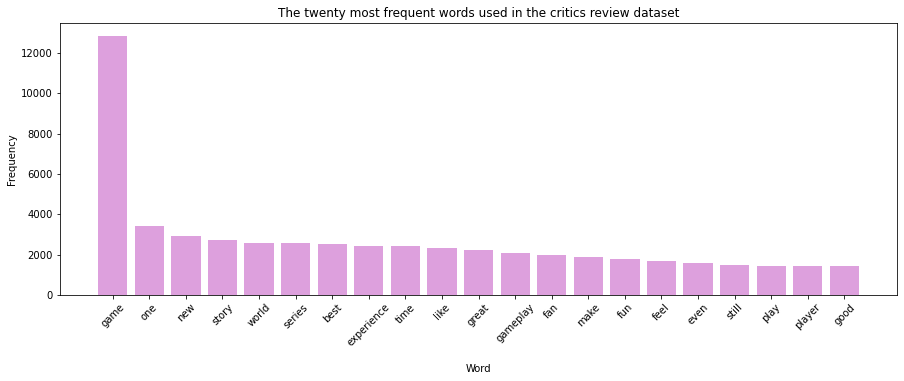

Figure 4: Bar graph of the twenty most frequent words used in the critics review dataset.


In [13]:
#get the frequency of words in the text, and extract the 20 most commonly used words
fdist = FreqDist(combined_text)
top_twenty_words = fdist.most_common(21)

#top_ten_words is a list of tuples, displayed as (word,frequency).
#using the zip and * operator unzips the tuples into independent lists
unzipped_top_twenty_words = list(zip(*top_twenty_words))

#plot top twenty words
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

axs.bar(unzipped_top_twenty_words[0], unzipped_top_twenty_words[1], color='plum')
axs.set_title("The twenty most frequent words used in the critics review dataset")
axs.set_ylabel("Frequency")
axs.set_xlabel("\nWord")
axs.xaxis.set_tick_params(rotation=45, labelsize=10)

figure_4_caption = """Figure 4: Bar graph of the twenty most frequent words used in the critics review dataset."""

plt.show()

print(figure_4_caption)

#### Question 4: What are the most frequent words used by critics when reviewing the games by publisher?

In [16]:
#df.publisher.nunique()
#33 different publishers --> to group by publisher in a new copy of df

A similar approach to question three's method has been used. A slight difference is the use and manipulation of the publisher variable. Upon initial analysis for question 4, I realised some of the publishers were duplicated and occurring twice in the data, which prompted the creation on the process_word function, used to convert text to lowercase, remove whitespace from either side of the text and remove any punctuation. This troubleshooting enabled a more streamlined grouping of publishers and therefore a better representation of their text frequency.

In [17]:
#obtain the data and columns needed for question 4
df4 = df.copy()
df4 = df4.loc[:, ['publisher', 'critic_review']]

#remove null values
df4.dropna(inplace= True)

#process text using process_text function
df4['publisher_new'] = df4['publisher'].apply(lambda x: process_word(x))

print(df4.publisher_new.nunique())

28


Some of the publishers with the same name have now merged, with the number of publishers going from 33 before preprocessing to 28 after.

The code below provides a means to group the reviews of each publisher into one observation, using the join method. This creates one complete text of reviews for each publisher and streamlines the processing of that text, ready for analysis. Initially, a list comprehension was used to append each review into a list of reviews, but this created issues when feeding that list into the process_text function as the function requires a string as an input and not a list.

In [18]:
#group the publishers and join reviews
publishers_grouped = df4.groupby('publisher_new').critic_review.apply(lambda x: ' '.join(x))
#print first 10 publishers to show that the code has worked
print(publishers_grouped[:10])

publisher_new
505 games                     Control is set in an engrossingly weird parano...
activision                    Gorgeous guns, a glittering universe, and a gr...
bandai namco entertainment    Little Nightmares 2 delivers similar stealth a...
bandai namco games            Dark Souls 3 sees the return of the king in a ...
bethesda softworks            Vaster, magnetic and more brutal than ever, DO...
bigben interactive            While occasionally frustrating, The Sinking Ci...
capcom                        This beautifully implemented port is a perfect...
deep silver                   Metro Exodus on the PlayStation 5 is more than...
electronic arts               Mass Effect: Andromeda only occasionally recap...
focus home interactive        Dontnod takes a thrillingly Gothic perspective...
Name: critic_review, dtype: object


In [19]:
#process text
publishers_grouped = publishers_grouped.apply(lambda x: process_text(x))
#print first 10 publishers to show that the text has been processed
print(publishers_grouped[:10])

publisher_new
505 games                     [control, set, engrossingly, weird, paranormal...
activision                    [gorgeous, gun, glittering, universe, great, p...
bandai namco entertainment    [little, nightmare, delivers, similar, stealth...
bandai namco games            [dark, soul, see, return, king, spectacular, c...
bethesda softworks            [vaster, magnetic, brutal, ever, doom, eternal...
bigben interactive            [occasionally, frustrating, sinking, city, com...
capcom                        [beautifully, implemented, port, perfect, pc, ...
deep silver                   [metro, exodus, playstation, simple, upgrade, ...
electronic arts               [mass, effect, andromeda, occasionally, recapt...
focus home interactive        [dontnod, take, thrillingly, gothic, perspecti...
Name: critic_review, dtype: object


In [20]:
#obtain top five words used for each publisher
top_10_words_publishers = publishers_grouped.apply(lambda x: dict(FreqDist(x).most_common(10)))
print(top_10_words_publishers[:10])

publisher_new
505 games                     {'control': 191, 'game': 146, 'remedy': 93, 'o...
activision                    {'game': 1049, 'call': 432, 'duty': 427, 'cras...
bandai namco entertainment    {'game': 286, 'dragon': 172, 'ball': 172, 'lit...
bandai namco games            {'soul': 241, 'dark': 196, 'game': 114, 'iii':...
bethesda softworks            {'game': 1236, 'doom': 418, 'fallout': 392, 'n...
bigben interactive            {'city': 149, 'sinking': 141, 'game': 139, 'st...
capcom                        {'evil': 657, 'resident': 654, 'game': 506, 'm...
deep silver                   {'metro': 187, 'exodus': 163, 'game': 127, 'wo...
electronic arts               {'game': 451, 'mass': 173, 'anthem': 172, 'eff...
focus home interactive        {'game': 358, 'story': 172, 'vampyr': 170, 'ta...
Name: critic_review, dtype: object


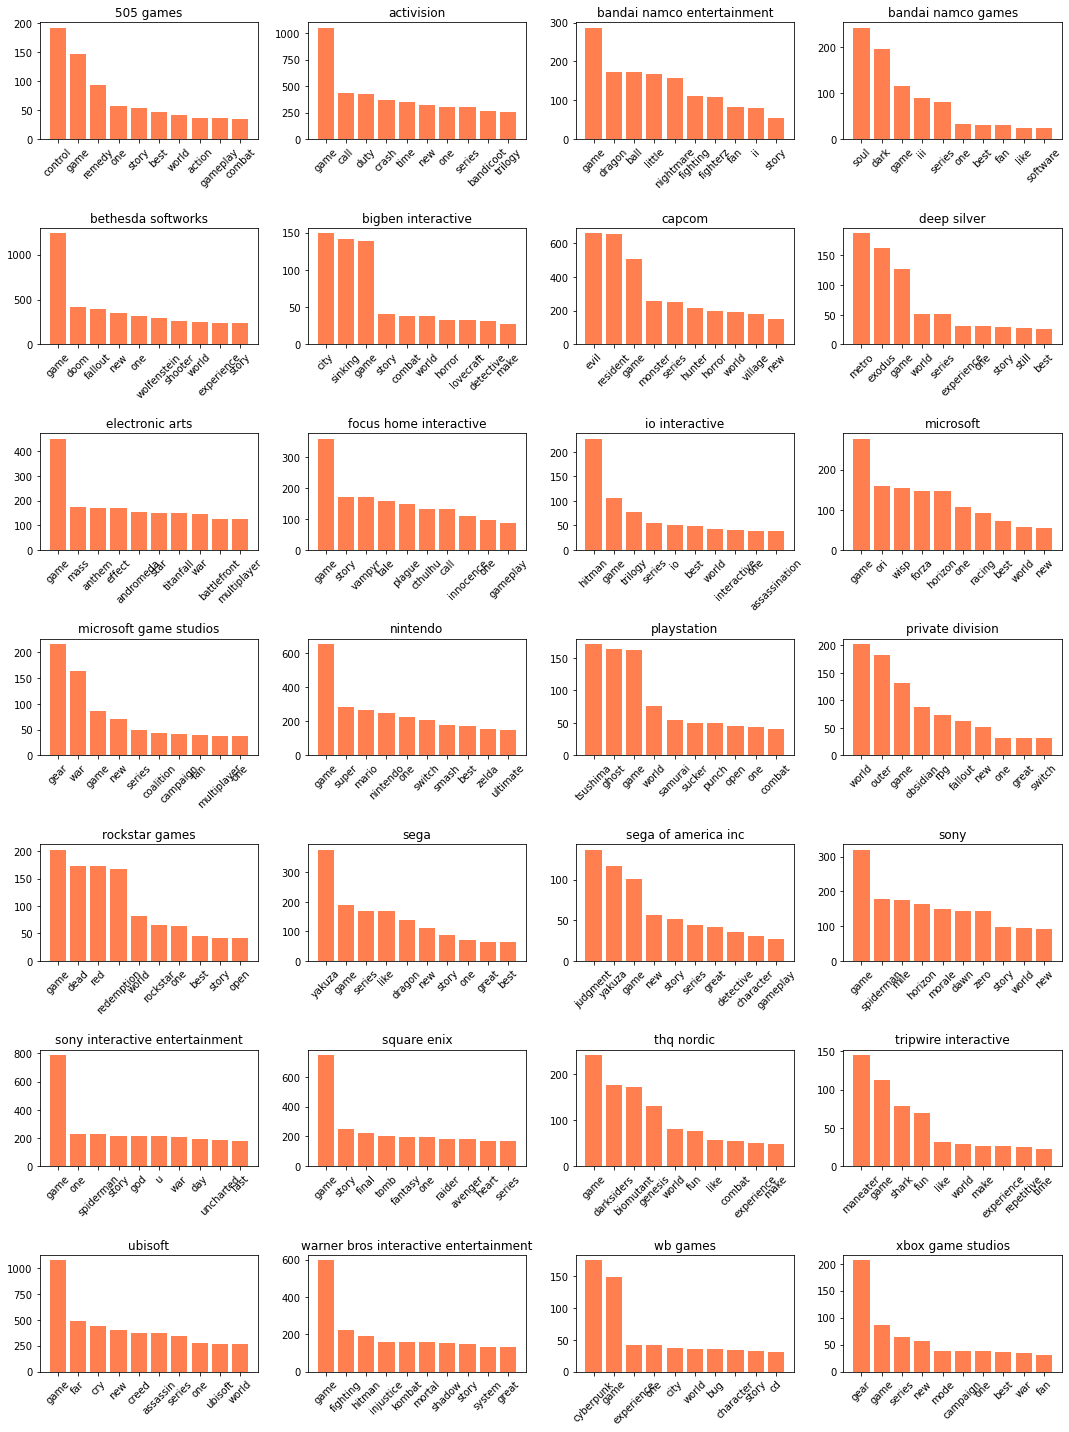

Figure 5: The top 10 words used in publishers games when reviewed on opencritic. Similar to figure 4,
the word 'game' is logically one of the more popular words used. Other popular words relate to the game under review, e.g.
'dragon' for Dragonball Z and 'resident' for Resident Evil.


In [22]:
#plot top 10 words by publisher
top_10_words_vals = top_10_words_publishers.values
top_10_words_index = top_10_words_publishers.index

#iterate through each publisher and plot in figure
fig, ax = plt.subplots(7,4,figsize=(15,20))
ax = ax.flatten()
positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(len(top_10_words_publishers)):
    ax[i].bar(top_10_words_vals[i].keys(), top_10_words_vals[i].values(), color='coral')
    ax[i].set_title(top_10_words_index[i])
    ax[i].xaxis.set_major_locator(ticker.FixedLocator(positions))
    ax[i].xaxis.set_major_formatter(ticker.FixedFormatter(list(top_10_words_vals[i].keys())))
    ax[i].xaxis.set_tick_params(rotation=45, labelsize=10)

#create caption for figure 5
figure_5_caption = """Figure 5: The top 10 words used in publishers games when reviewed on opencritic. Similar to figure 4,
the word 'game' is logically one of the more popular words used. Other popular words relate to the game under review, e.g.
'dragon' for Dragonball Z and 'resident' for Resident Evil."""
plt.tight_layout()
plt.show()

print(figure_5_caption)

#### Question 5: By grouping each individual critics scores into a ratings category based on the opencritic.com rating system(mighty, strong, fair, weak), what are the most frequent words used in each rating?

Opencritic categorises a game, based on the average critics score, into one of four categories:

- Mighty: average critics score is 90th percentile or higher
- Strong: avergae critics score between 60th and 90th percentile
- Fair: average critics score between 30th and 60th percentile
- Weak: average critics score is in the bottom 30th percentile

I shall be using this same system to categorise each critic score as a good way to find out if there is a difference in words used on a review based on the quality of a game. This categorisation will also be useful in the classification models.

The preprocessing technique required this analysis is similar to question three and four, except a new column is created to categorise the critic scores into one of the four classes mentioned above.

In [23]:
#get the columns required for question 5
df5 = df.loc[:,['critic_review', 'critics_score']]

#drop null values
df5.dropna(inplace=True)

#create new column for opencritic rating and use categorise_scores function
df5['opencritic_rating'] = df5['critics_score'].apply(lambda x: categorise_scores(x))
df5.head()

,critic_review,critics_score,opencritic_rating
0,There's a category of games I think of as Satu...,79.0,strong
1,"With The Outer Worlds, Obsidian has found its ...",85.0,strong
3,"A deep, funny, and intricately designed RPG re...",90.0,mighty
4,The Outer Worlds marks Obsidian operating at t...,90.0,mighty
6,Classic RPG sensibilities enhance wonderful ch...,93.0,mighty


The above code used a new function called categorise_scores. This function takes in a list of values, and for each value, classifies it into either a mighty, strong, fair or weak rating.

In [24]:
#group by opencritic_rating
ratings_grouped = df5.groupby('opencritic_rating').critic_review.apply(lambda x: ''.join(x))
ratings_grouped

opencritic_rating
fair      The Outer Worlds is one of the most polished a...
mighty    A deep, funny, and intricately designed RPG re...
strong    There's a category of games I think of as Satu...
weak      Yooka-Laylee is a fun platformer, despite some...
Name: critic_review, dtype: object

In [25]:
#process text using the process_text function
ratings_grouped = ratings_grouped.apply(lambda x: process_text(x))
ratings_grouped

opencritic_rating
fair      [outer, world, one, polished, best, game, type...
mighty    [deep, funny, intricately, designed, rpg, remi...
strong    [there, category, game, think, saturday, morni...
weak      [yookalaylee, fun, platformer, despite, techni...
Name: critic_review, dtype: object

In [26]:
top_10_words_ratings = ratings_grouped.apply(lambda x: dict(FreqDist(x).most_common(10)))
top_10_words_ratings

opencritic_rating
fair      {'game': 316, 'fallout': 77, 'world': 73, 'lik...
mighty    {'game': 4000, 'one': 1186, 'best': 963, 'new'...
strong    {'game': 5253, 'one': 1310, 'new': 1253, 'stor...
weak      {'world': 5, 'game': 4, 'change': 3, 'level': ...
Name: critic_review, dtype: object

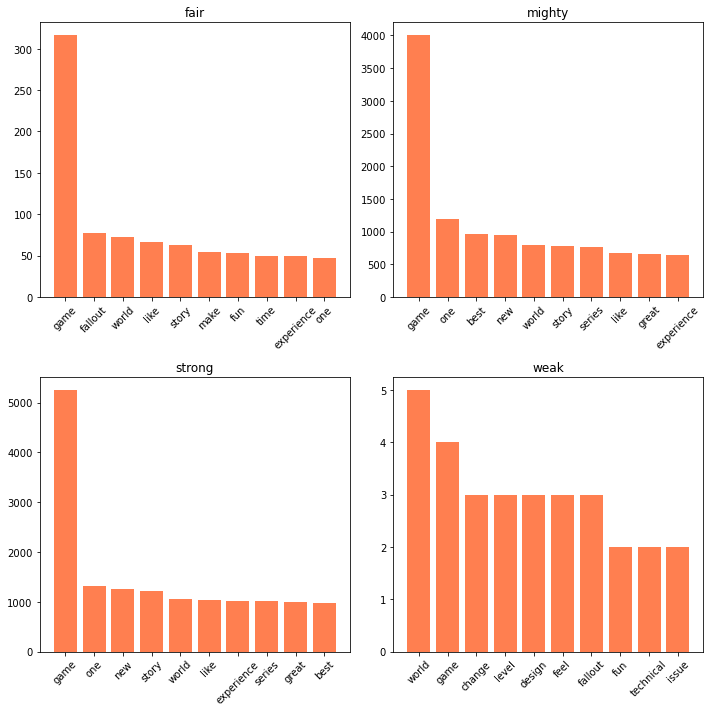

Figure 6: Ten most used words in reviews for games based on individual critic rating (mighty, strong, 
fair and weak)


In [27]:
#plot the four ratings
top_10_words_ratings_vals = top_10_words_ratings.values
top_10_words_ratings_index = top_10_words_ratings.index

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

for i in range(len(top_10_words_ratings)):
    ax[i].bar(top_10_words_ratings_vals[i].keys(), top_10_words_ratings_vals[i].values(), color='coral')
    ax[i].set_title(top_10_words_ratings_index[i])
    ax[i].xaxis.set_major_locator(ticker.FixedLocator(positions))
    ax[i].xaxis.set_major_formatter(ticker.FixedFormatter(list(top_10_words_ratings_vals[i].keys())))
    ax[i].xaxis.set_tick_params(rotation=45, labelsize=10)
    
#create caption for figure 6
figure_6_caption = """Figure 6: Ten most used words in reviews for games based on individual critic rating (mighty, strong, 
fair and weak)"""
    
plt.tight_layout()
plt.show()

print(figure_6_caption)

### Sentiment classification

For the sentiment classifier, I imported new data that contains the converted opencritic rating for each critic review. Although critic reviews are not rated this way and only the average critic scores are, I feel that categorising the reviews this way helps with the classifier by providing a gaming company with a one word verification as to how that game could be rated, based on the sentiment of the review. I could have taken the regression approach with the critic score and calculated the accuracy of the models using the root mean squared error, but from a production point of view, predicting that the sentiment analysis of a review will give you a 'strong' score is easier for people to quickly interpret than a numerical value out of 100. Also, if most of the ratings are 'fair' then there is a strong assumption that the average critic score will be a value within the 30th and 60th percentile, which is a large margin to not miss.

The reviews will be processed into a vectorized matrix, tokenising, lemmatising and removing any punctuation before using the tf-idf (term frequency- inverse document frequency) vectorizer. This is an algorithm that applies weight to each word in a document based on their appearance in other documents in a corpus i.e. words 'uniqueness' in that document compared to the rest of the corpus. For example, if there is a word in a document that doesn't appear in the other documents within that corpus, then that word will obtain a large value for it being unique to that document in relation to the other documents$^{10}$.

In [29]:
#import the data for the classifiers
df_for_classifer = pd.read_csv('opencritic_data_with_ratings.csv', index_col= 'Unnamed: 0')
df_for_classifer.head()

,name,developer,publisher,genre,release_date,description,critics_average_score,critic_review,date_of_review,critics_score,opencritic_rating_critics_score
0,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,There's a category of games I think of as Satu...,2019-10-22 00:00:00,79.0,strong
1,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"With The Outer Worlds, Obsidian has found its ...",2019-10-22 00:00:00,85.0,strong
2,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A conventional, easygoing scifi RPG with sligh...",2019-10-22 00:00:00,NaN,weak
3,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A deep, funny, and intricately designed RPG re...",2019-10-29 00:00:00,90.0,mighty
4,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,The Outer Worlds marks Obsidian operating at t...,2019-10-22 00:00:00,90.0,mighty


In [30]:
#get the columns and data required for the classifier
df_c = df_for_classifer.loc[:,['critic_review','opencritic_rating_critics_score']]
df_c.dropna(inplace=True)
df_c.head()

,critic_review,opencritic_rating_critics_score
0,There's a category of games I think of as Satu...,strong
1,"With The Outer Worlds, Obsidian has found its ...",strong
2,"A conventional, easygoing scifi RPG with sligh...",weak
3,"A deep, funny, and intricately designed RPG re...",mighty
4,The Outer Worlds marks Obsidian operating at t...,mighty


An issue that I had whilst running the classifiers, especially with Synthetic Minority Oversampling Technique (SMOTE) being implemented to fabricate more data in the data set, was a memory error. The memory demand to process the SMOTE technique and run the K-folds cross-validation technique on the classifiers was too great. To rectify this, I decided to use a smaller sample. The 'frac' in the code below can be modified to suit the memory demands of the computer in use$^{11}$.

In [31]:
#take a sample of the data
df_c = df_c.sample(frac=0.5, random_state=0)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7663 entries, 1335 to 3439
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   critic_review                    7663 non-null   object
 1   opencritic_rating_critics_score  7663 non-null   object
dtypes: object(2)
memory usage: 179.6+ KB


In [32]:
#how many rating scores for each category?
ratings_grouped = df_c.groupby('opencritic_rating_critics_score').critic_review.count()
print(ratings_grouped)

opencritic_rating_critics_score
fair       167
mighty    2378
strong    3298
weak      1820
Name: critic_review, dtype: int64


The reason for the SMOTE technique is to oversample the 'fair' reviews, with only 167 available for training the classifier. SMOTE creates synthetic examples by operating in the 'feature space' instead of the 'data space'. This is achieved by creating synthetic data points along the lines joining any or all of the k minority class nearest neighbours. The synthetic data points are randomly allocated on these lines. The k neighbours are slected randomly depending on the amount of oversampling that is required. A potential downside of SMOTE is that the majority classes are not considered when the synthetic samples are created for the minority classes. The overlapping of review lexicon between the classes may be more nuanced but this is not considered with SMOTE$^{12}$.

### Processing text for classifiers using test driven development

I have processed the text for the classifier by using test driven development as a way to ensure that the output at each stage of the process is producing the data required for the next step. I found this technique really useful in the refactoring stage, where I had the opportunity to make my code cleaner while ensuring that the unit tests still pass. In hindsight, this would have been really useful in other stages of my project. For more assistance in helping to develop the mindset and skills to write the code in a different way, I used the unit test framework page on the python docs website$^{13}$, and the test driven development article from rubikscode.net for more understanding$^{14}$.

#### The code to test

In [33]:
#remove punctuation
def remove_punctuation(reviews):
    punctuation = string.punctuation
    new_list = []
    for review in reviews:
        new_string = ''
        for letter in review:
            if letter not in punctuation:
                new_string += letter
        new_list.append(new_string)
    
    return new_list 

#lemmatize
def lemmatize_review(reviews):
    new_list = []
    lem = WordNetLemmatizer()
    for review in reviews:
        #tokenize review
        tokenised = word_tokenize(review)
        lemmatized_list = []
        for word in tokenised:
            lemmatized_word = lem.lemmatize(word)
            lemmatized_list.append(lemmatized_word)
        new_string = " ".join(lemmatized_list)
        new_list.append(new_string)
    return new_list

#use tfidfVectorizer to convert words to lowercase, removes stopwords and tokenizes the data
def tfidfvectorize_reviews(review):
    stop_words = set(stopwords.words('english'))
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    fit_review = vectorizer.fit_transform(review)
    matrix = fit_review.toarray()
    return matrix

#### Unit tests

In [34]:
class TestTextFormatting(unittest.TestCase):
    
    def test_remove_punc_exists(self):
        self.assertIsNotNone(remove_punctuation)
    
    def test_punctuation_removed(self):
        res = remove_punctuation(['x'+ string.punctuation, 'y'+ string.punctuation])
        for r in res:
            self.assertNotRegex(r,'[\W]')
        
    def test_lemmatizer_exists(self):
        self.assertIsNotNone(lemmatize_review)
        
    def test_words_lemmatized(self):
        tester = ["corpora rockers", "players syllabi"]
        res = lemmatize_review(tester)
        self.assertEqual(res, ["corpus rocker", "player syllabus"])
    
    def test_vectorizer_exists(self):
        self.assertIsNotNone(tfidfvectorize_reviews)
        
    def test_words_vectorized(self):
        tester = ["This is a review",
          "This is a very good review",
          "This is a very bad review",
          "This is an awful review dont watch",
          "This review is outstanding"
          ]
        res = tfidfvectorize_reviews(tester)
        self.assertEqual(type(res), np.ndarray)
    
unittest.main(argv=['ingored', '-v'], exit=False)

test_lemmatizer_exists (__main__.TestTextFormatting) ... ok
test_punctuation_removed (__main__.TestTextFormatting) ... ok
test_remove_punc_exists (__main__.TestTextFormatting) ... ok
test_vectorizer_exists (__main__.TestTextFormatting) ... ok
test_words_lemmatized (__main__.TestTextFormatting) ... ok
test_words_vectorized (__main__.TestTextFormatting) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.006s

OK


In [35]:
#get the reviews so they can be vectorized
text_to_process = df_c.loc[:,'critic_review']

#the y variable are the ratings
y = df_c.loc[:,['opencritic_rating_critics_score']].reset_index(drop=True)

#process the reviews into a vectorized matrix
remove_punc = remove_punctuation(text_to_process)
lemmatize_text = lemmatize_review(remove_punc)
tfidf_vectorize_text = tfidfvectorize_reviews(lemmatize_text)

In [36]:
y.head()

,opencritic_rating_critics_score
0,mighty
1,strong
2,weak
3,mighty
4,weak


In [37]:
#display the matrix for X in a Dataframe
X = pd.DataFrame(data=tfidf_vectorize_text)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Multinomial bayes classfier

The multinomial bayes classifier works off the principle of probability, and defines the probability that a piece of data belongs to a specific class, given our prior knowledge. The model will be trained and evaluated using a k-fold cross validation evaluator. This works by splitting the data into k-1 folds as the training data (what the model is trained with) with the last part of the data the holdout/validation set. This ensures that overfitting is avoided and prevents potential bias when randomly splitting the data into a training and test set. The final evaluation score is the average of the k number of validation scores provided$^{15}$.

In [38]:
#instantiate classifier and get cross-validated scores
NB = MultinomialNB()
NB_scores = cross_val_score(NB, X, np.ravel(y), cv=10)

In [39]:
#mean of the scores
NB_scores_mean = round(np.mean(NB_scores), 2)

#### Support vector machines classifier

This is a powerful and versatile machine learning tool that can be used in both a regression a classification setting. The classifier creates decision boundaries to separate the data into classes, where these boundaries are supported by instances located at the edge of each boundary. These instances are know as the support vectors$^{16}$. SVMS are sensitive to feature scaling, hence why the tf-idf classifier has been used.

In [40]:
#instantiate SVM classifier and get cross-validate scores
regr = svm.LinearSVC()
svm_scores = cross_val_score(regr, X, np.ravel(y), cv=10)

In [41]:
svm_scores_mean = round(np.mean(svm_scores), 2)

#### Performing 10-fold cross-validation on the data after using SMOTE

In [42]:
#SMOTE
oversample = SMOTE(k_neighbors=4)
oversampled_X, oversampled_y = oversample.fit_resample(X, y)

In [43]:
#NB classifier with SMOTE implemented
oversampled_NB_scores = cross_val_score(NB, oversampled_X, np.ravel(oversampled_y), cv=10)
oversampled_NB_scores_mean = round(np.mean(oversampled_NB_scores), 2)

In [44]:
#SVM classifier with SMOTE implemented
oversampled_svm_scores = cross_val_score(regr, oversampled_X, np.ravel(oversampled_y), cv=10)
oversampled_svm_scores_mean = round(np.mean(oversampled_svm_scores), 2)

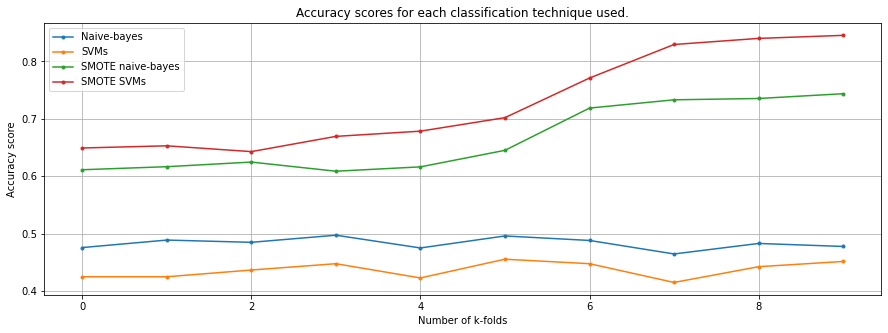

Figure 7: Accuracy scores for the machine learning classifiers used on the data.

+----------------------------+------------------------+
|                            | Average accuracy score |
+----------------------------+------------------------+
|        NB classfier        |          0.48          |
|      SVMs classifier       |          0.44          |
|  NB classifier with SMOTE  |          0.67          |
| SVMs classifier with SMOTE |          0.73          |
+----------------------------+------------------------+
Table 4: Average accuracy scores for each model trained using k-fold cross-validation.


In [45]:
#plot the results
fig, ax = plt.subplots(1,1,figsize=(15,5))
labels = ["Naive-bayes", "SVMs", "SMOTE naive-bayes", "SMOTE SVMs"]

ax.plot(NB_scores, '.-')
ax.plot(svm_scores, '.-')
ax.plot(oversampled_NB_scores, '.-')
ax.plot(oversampled_svm_scores, '.-')
#tidy the plot
ax.grid()
ax.set_xlabel("Number of k-folds")
ax.set_ylabel("Accuracy score")
ax.set_title("Accuracy scores for each classification technique used.")
ax.legend(labels)

plt.show()

#create a caption for the figure (7)
figure_7_caption = """Figure 7: Accuracy scores for the machine learning classifiers used on the data."""

print(figure_7_caption)
print()

#classifier table showing the mean accuracy scores
classifiertable = PrettyTable(["", "Average accuracy score"])
classifiertable.add_row(['NB classfier', NB_scores_mean])
classifiertable.add_row(['SVMs classifier', svm_scores_mean])
classifiertable.add_row(['NB classifier with SMOTE', oversampled_NB_scores_mean])
classifiertable.add_row(['SVMs classifier with SMOTE', oversampled_svm_scores_mean])

print(classifiertable)

#create caption for table 4
table_4_caption = """Table 4: Average accuracy scores for each model trained using k-fold cross-validation."""

print(table_4_caption)

## Results

#### Question 1: Is there any correlation between the length of the critic's review and the critic's score?

Dayi Lin et al found in the analysis of review data on steam that although negative reviews seem to have slightly longer reviews than positive reviews, the difference is negligible$^{17}$. Potentially, the opposite seems to apply to opencritic reviews when reviewing the scatterplot between review length and critics score: a small group of reviews with a critic score above 70 appear to have a word count of 250 words or greater. This poses the question of whether there is a greater likelihood for games with better review scores to have a larger review written about them.

There is a propensity for the distribution of the critic scores to skew towards the lower scores, with a heavy concentration of the sample around the mean of 85. The review length skews slightly towards the higher word counts, with a large portion of values existing outside of the inter quartile range. However, this is due to a large concentration of samples around the mean, which therefore questions the true number of outliers. From figure 1, it is estimated that the true mean of review length is approximately 49.58, or 50 words when rounded with the true mean of critics score at approximately 82.78, rounded to 83%. The confidence intervals don’t have a wide range, with the range for length of review and critics score being approximately 1 and 0.42, respectively. This questions the sampling quality of the data set and whether more reviews in general tend to have a word length around 50 with a score around the 83rd percentile. It worthwile collecting another sample and performing a confirmatory analysis.

The correlation between the two variables was evaluated using the correlation coefficient, with score of -0.00852 measuring no relationship between the them. This question can conclusively be answered- there is no correlation between the length of critic reviews and the critic's score, although this analysis also raises the question if there is a subpopulation of games with high reviews that reviewers have a tendency to write more about, and are these games marketed more before release, hence the need for reviewers touse a larger word count to scrutinise their performance more? These could all be investigated more in further work.

#### Question 2: How many critics reviews are there per game, and does this correlate with the average critics score?

It has been documented that the increase in the word of mouth of a product, regardless of whether that review is positive or negative, can increase the awareness of that product and consequently the sales of that product$^{18}$. In this project, does the volume of reviews also correlate with an increased average critics score? Fundamentally, any correlation between these two variables does not imply a link between the two: the notion that the average critic score causes the number of reviews written to increase, or vice versa, doesn’t seem like a feasible hypothesis. However, there can potentially be an indirect link if correlation is observed.

In figure 3, the distribution of the two variables is plotted along with a scatterplot displaying the variables against each other and their regression line. The calculated correlation coefficient between the two variables is 0.21. Although a weak correlation, there is a noticeable sample of data points that have an average critics score of greater than 80 and a review number approximately greater than 170. Average critics scores of less than 80, tend to have a review number of less than approximately 170. The distributions for both variables are unremarkable with minimal skewness and a lack of outliers, as evidenced by the standardised distributions in figure 3. Table 3 gives a summary of the statistics generated from the data. The number of reviews has a range of 66 reviews and a standard deviation of approximately 17 reviews. The mean and median are close in value, supporting a lack of skewness in the data. The critics average score has a range of 44%, with the lowest score a ‘weak’ opencritic rating of 53 and the highest a ‘mighty’ score of 97. With a standard deviation of 7.8, there isn’t too much deviation from the mean, supporting the idea that a large portion of the data in the data set is concentrated around the mean (81.97).

This question can be concluded with the weak correlation of 0.21- a relationship between review volume per game and average critics score could not be established. However, as there are video games with high average critics scores that have a higher number of reviews, there could be reason to investigate for these higher review volumes, and suspect influences such as marketing or greater popularity pre-release and therefore a greater likelihood for more attention from critics for games that are already primed for a great review even before release.

#### Question 3: What are the most frequent words used by critics when reviewing a game on opencritic?

Figure 4 provides a visualisation of the 20 most common words used in the critic’s reviews. The word used the most in the reviews is ‘game’, although this requires no context at all as the reviews are based on the performance of video games.

Some more noteworthy words in the graph are ‘like’, ‘great’, ‘fun’, ‘feel’ and ‘good’ as these are notably sentiment-oriented words directed at the critic's feeling towards an aspect of the game, such as ‘gameplay’, ‘world’ or ‘story’, which are gaming mechanics that are also present in figure 4. There could be a potential link here between the mean critics average score and the use of words that imply sentiment.


#### Question 4: What are the most frequent words used by critics when reviewing the games by publisher?

For this question, the top 10 words used by reviewers are analysed based on video game publisher e.g. Sega. Analysing the results in figure 5, ‘game’ is unsurprisingly the most frequent word used by reviewers, as we witnessed in question 3. Video game names, or parts of names, are seen as part of the top words. For example, Red Dead Redemption is a video game by Rockstar games, and this is evident with ‘dead’, ‘red’ and ‘redemption’ being in the top 5 words used by reviewers for games by this publisher, which doesn’t provide information in relation to the question. However, ‘best’ does occur in the top 10 for Rockstar Games, providing insight into the game’s reputation as one of the best video games to be released in recent years.

Video game mechanics occur frequently in many of the publisher’s top 10, such as ‘combat’, ‘multiplayer’, ‘experience’ and ‘story’. For publishers, there could be a link between the emphasis on certain gameplay mechanics and the sentiment that critics give towards them which can potential be explored in greater detail to improve a product. This game may be answered better if words with no sentiment can be filtered out of the list for a better representation of sentiment.


#### Question 5: By grouping the individual critics scores into opencritic.com ratings (might, strong, fair, weak), what are the most frequent words used in each rating?

Figure 6 has four bar graphs displaying the top10 words used in reviews based on if that review was categorised into an opencritic rating. The words to note in the figure for each category are as follows:

- Mighty: best, like, great
- Strong: great, best, like
- Fair: like, fun
- Weak: technical, issue

There appears to be a decrease in positive sentiment as the rating decreases. For games with a mighty, strong and fair rating, experience, story and world are mechanics that critics seem to concentrate more in their reviews, with the world and design being the focus for weak reviews. Critics seem to give weak ratings to video games due to ‘technical issues’. However, this will need to be investigated some more due to the poor sampling of weak games for question 5. This poor sampling may have been due to weak games not having a review score or a review for analysis.


#### Sentiment classifier

Figure 7 displays the accuracy scores from the 10-fold cross validation sentiment classifiers, SVMs and naïve bayes; with table 4 representing the average accuracy scores. It is evident figure 7 that SVMs is the better performing classifier, with naïve bayes performing at 44%, although the difference is negligible with SVMs performing at 48%. This is supported by the literature in the related work section, which used similar machine learning classifiers$^{8, 9}$. However, an increase in smaller classes with SMOTE increases the performance of both classifiers, with the average score increasing to 66% and 72% for naïve bayes and SVMs, respectively. With only 167 observations for ‘fair’ ratings, there was always going to be a problem of that class being overwhelmed by the other classes during the training of the model, but synthetic oversampling of this minority class may have been the reason for an increase in the scores.

There is a clear pattern in the classifier: SVMs is a better performer than naive bayes on this data, with the addition of SMOTE improving the accuracy of both classifiers. However, SMOTE doesn't take the other classes into consideration when oversampling and this may be a downside of the technique although the cross-validation technique ensures that there is no potential overfitting if every data point is involved in one of the holdout folds. With these results, the SMVs classifier with SMOTE implementation is a satisfactory way to analyse sentiment and make predictions about the potential rating of a gaming product on opencritic.

## Discussion

The video game industry can learn a lot from reviews of their gaming products. This project however, has shown a contrast in the nature of sentiment analysis. Figure 6 provided potential evidence that games with higher ratings have positive words in their reviews, such as 'best' and 'great', with weaker games having a lower number of positive sentiment. However, weak games had a poorer sample representation for question 5. Mighty, strong and fair games had similar words when it came to positive sentiment. This may be the reason why Santos et al found the the language of critics (or expert) reviews are more complex and less likely to express emotion when compared to amateur reviews, who express more emotions and sentiment in their reviews$^{19}$. Further exploration may be required into question 5, with analysis of amateur reviews also included, to test the hypothesis that they indeed do provide better degrees of sentiment in reviews. This may also require a better sampling of weak reviews.

In contrast, I found no relationship between the length of review and critic score, although it has been acknowledged that there is a tendency for critics to be balanced and nuanced in the way that they review gaming products from a professional standpoint. Video game companies would potentially get no insight into the performance of their games with the relationship between length of review and critic score, and this also applies to the relationship between review volume and average critics score. It has been reported in previous studies that the volume of reviews can increase the sales of that product, specifically due to awareness raised and regardless of whether the review is positive or negative$^{3, 18}$. As question 2 discovered a portion of high reviewed games with a higher volume of reviews, this poses the question of whether there is an increased awareness of these games due to a  higher number of reviews, as this would impact the sales of the game in a positive way. However, this also does contradict the sampling process for this project, where the top 100 video games with the highest volume of reviews were collected. This question will need to be answered again, but with a better sampling of video games. 

The issue with machine learning sentiment is the inability to detect true sentiment of a review. As stated in the paper by Pang et al, a video game could potentially 'thwart' a critic's expectation, setting up a deliberate contrast in their review sentiment$^{20}$. For example, "This film should be brilliant, however, it can't hold up" is a contrasting statement that would be regarded as a difficult sentiment to classify for a machine, but an easy sentiment to review by a human. Essentially, having the ratings as the output for classification assists in alleviating the effect of this complication, but it is still a stumbling block to consider with sentiment analysis.

Fine-tuning the classifiers with SMOTE improved the accuracy to an acceptable level, although it will be difficult to replicate the power of human sentiment analysis. With the number of reviews out in the internet ether, sentiment analysis through machine learning is a useful tool to analyse a large number of reviews quickly to understand how a video game is performing, reducing the need for human labour for such a laborious task that could introduce human error. The addition of feature extraction in future work could help deal with computational power and remove features that help in no way towards the classifier, helping to improve capture the context of a video game review.   

In combination with word frequency critic and amateur reviews, sentiment classifiers could discover general trends into what aspects of a game reviewers are happy with and what could be improved upon. More importantly, improving upon the negatives and seeing an increase in the volume of reviews could certainly go a long way into increasing the sales of future video games.

## Conclusion

I pursued this project to answer the question of whether the language from video game reviews can assist video game companies in analysing the quality of their games. As a competitive market, there is a potential usefulness to analyse critic reviews with a sentiment classifier with the purpose of improving the quality of future games, but if language is the element that can improve a product, then it would be worth focussing more on the passion of the amateurs instead of the calm equanimity of critics.

## References (Vancouver format)

1. Baettie, A. How the Video Game Industry Is Changing. Available from: https://www.investopedia.com/articles/investing/053115/how-video-game-industry-changing.asp [14/08/2021] 

2. Jalilvand MR, Esfahani SS, Samiei N. Electronic word-of-mouth: Challenges and opportunities. 2011;3:42–6

3. Duan W, Gu B, Whinston AB. The dynamics of online word-of-mouth and product sales—An empirical investigation of the movie industry. J Retail. 2008;84(2):233-242

4. Chong AYL, Ch’ng E, Liu MJ, Li B. Predicting consumer product demands via Big Data: the roles of online promotional marketing and online reviews. 2017;55(17):5142–56.

5. Chevalier JA, Mayzlin D. The Effect of Word of Mouth on Sales: Online Book Reviews. 2006;43(3):345–54

6. Dellarocas C. The Digitization of Word of Mouth: Promise and Challenges of Online Feedback Mechanisms. 2003 Oct 1;49(10):1407–24

7. Brown, J. Companies using sentiment-analysis software to understand employee concerns. Available from: https://www.ciodive.com/news/companies-using-sentiment-analysis-software-to-understand-employee-concerns/407357/ [14/08/2021]

8. Kumar K, Harish BS, Darshan HK. Sentiment Analysis on IMDb Movie Reviews Using Hybrid Feature Extraction Method. 2019;5(5):109–14.

9. Pandas development team. Returning a view versus a copy. Available from: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [29/08/2021]

10. Scikit-learn developers. Text feature extraction. Avilable from: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction [30/08/2021]

11. Pandas development team. pandas.DataFrame.sample (API reference). Available from: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html [30/08/2021]

12. Chawla NV, Bowyer KW, Hall LO, Kegelmeyer WP. SMOTE: Synthetic Minority Over-sampling Technique. 2002 Jun 1;16:321–57

13. Python Software Foundation. unittest- Unit testing framework. Available from: https://docs.python.org/3/library/unittest.html?highlight=unittest#module-unittest [18/08/2021]

14. Zivkovic, N. Test driven development (TDD) with python. Avaliable from: https://rubikscode.net/2021/05/24/test-driven-development-tdd-with-python/ [18/08/2021]

15. Scikit-learn developers. Cross-validation: evaluating estimator performance. Available from: https://scikit-learn.org/stable/modules/cross_validation.html [22/08/2021]

16. Geron, A. Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow. 2nd ed. Canada: O'Reilly Media; 2020: 153-156. 

17. Lin D, Bezemer C-P, Zou Y, Hassan A. An empirical study of game reviews on the Steam platform. 2019 Feb 15;24(1):170–207.

18. Duan W, Gu B, Whinston AB. The dynamics of online word-of-mouth and product sales—An empirical investigation of the movie industry. 2008;84(2):233–42

19. Santos T, Lemmerich F, Strohmaier M, Helic D. What’s in a Review: Discrepancies Between Expert and Amateur Reviews of Video Games on Metacritic. 2019;3(CSCW):1–22

20. Pang B, Lee L, Vaithyanathan S. Thumbs up? Sentiment Classification using Machine Learning Techniques. 2002 May 27





